# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

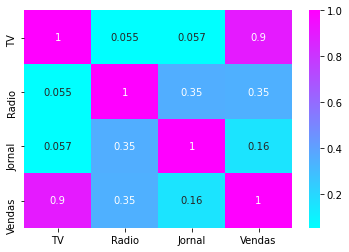

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tabela = pd.read_csv('advertising.csv')

sns.heatmap(tabela.corr(), annot=True, cmap="cool")
plt.show()


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Separa os dados em X e Y
y = tabela['Vendas']
x = tabela.drop('Vendas', axis=1)

# Separa os dados em dados de teste e dados de treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

# Cria os modelos de regressão
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treina as inteligências artificiais
modelo_regressaolinear.fit(x_treino,y_treino)
modelo_arvoredecisao.fit(x_treino,y_treino)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [27]:
# Criando as previsões
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# Imprimindo os resultados
print(f'Regressão Linear - Porcentagem de acerto: {metrics.r2_score(y_teste, previsao_regressaolinear)*100:.2f}%')
print(f'Árvore de Decisão - Porcentagem de acerto: {metrics.r2_score(y_teste, previsao_arvoredecisao)*100:.2f}%')

Regressão Linear - Porcentagem de acerto: 92.97%
Árvore de Decisão - Porcentagem de acerto: 95.49%


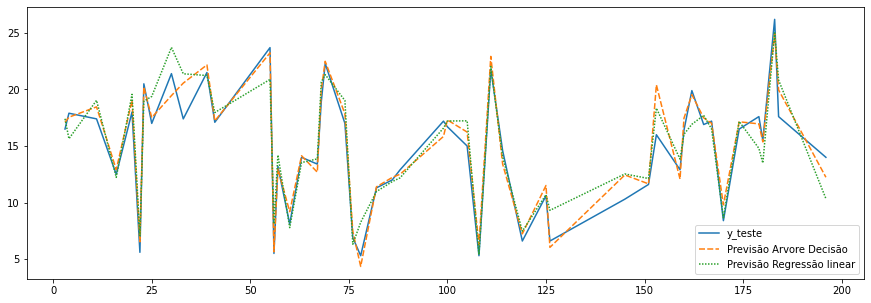

In [19]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsão Arvore Decisão'] = previsao_arvoredecisao
tabela_auxiliar['Previsão Regressão linear'] = previsao_regressaolinear

plt.figure(figsize=(15,5))
sns.lineplot(data=tabela_auxiliar)

plt.show()

#### Qual a importância de cada variável para as vendas?

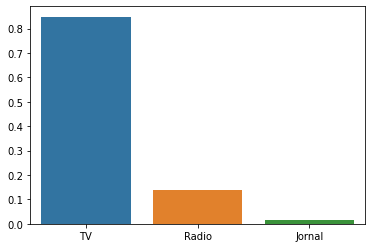

In [21]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()